# Pandas – Lekcja 2: Operacje na DataFrame

Po przejściu przez ten notatnik będziesz potrafić:

1. Tworzyć `DataFrame` na kilka sposobów – z list, słowników, macierzy *NumPy*, serii i plików CSV.
2. Szybko podglądać dane (`head`, `tail`, `describe`).
3. Zarządzać indeksem (ustanawiać, resetować, modyfikować).
4. Pobierać dane precyzyjnie za pomocą `loc`, `iloc`, `at`, `iat`.
5. Selekcjonować i filtrować wiersze oraz kolumny, także przy wielu warunkach logicznych.
6. Wycinać, czyścić i modyfikować dane.
7. Przećwiczyć wszystko na realistycznym zbiorze cen produktów.

Na końcu znajdziesz **zadania praktyczne** – rozwiąż je, aby utrwalić wiedzę.

In [1]:
import pandas as pd
import numpy as np

## 1 <a id='konstruktory'></a> Tworzenie `DataFrame` – różne konstruktory

In [5]:
df_dict = pd.DataFrame({
    'Imię': ['Adam'],
    'Wiek': [30]
})

In [3]:
df_dict

,Imię,Wiek
0,Adam,30


In [6]:
# 1A. Z słownika list
df_dict = pd.DataFrame({
    'Imię': ['Anna', 'Bartek', 'Celina'],
    'Wiek': [23, 35, 29]
})
df_dict

,Imię,Wiek
0,Anna,23
1,Bartek,35
2,Celina,29


In [7]:
# 1B. Z listy słowników
df_list_of_dicts = pd.DataFrame([
    {'Miasto': 'Warszawa', 'Populacja': 1793579},
    {'Miasto': 'Kraków',   'Populacja': 779115},
])
df_list_of_dicts

,Miasto,Populacja
0,Warszawa,1793579
1,Kraków,779115


In [8]:
# 1C. Z listy list + kolumny
df_list = pd.DataFrame(
    [[1, 2, 3], [4, 5, 6]],
    columns=['A', 'B', 'C']
)
df_list

,A,B,C
0,1,2,3
1,4,5,6


In [9]:
# 1D. Z macierzy NumPy
arr = np.random.randn(4, 3)

In [10]:
arr

array([[ 0.42482334, -1.21840105,  0.00219085],
       [-0.4730992 , -0.15305436,  0.48301356],
       [ 1.16132565, -0.64620174, -0.26375137],
       [ 0.07415325,  0.66751637, -1.31121212]])

In [11]:

df_arr = pd.DataFrame(arr, columns=['X', 'Y', 'Z'])
df_arr

,X,Y,Z
0,0.424823,-1.218401,0.002191
1,-0.473099,-0.153054,0.483014
2,1.161326,-0.646202,-0.263751
3,0.074153,0.667516,-1.311212


## 2 <a id='podglad'></a> `head`, `tail`, `describe`
Funkcje **`head()`** i **`tail()`** pozwalają podejrzeć początek i koniec danych, a **`describe()`** – błyskawicznie uzyskać statystyki opisowe dla kolumn numerycznych. Przyjrzyjmy się temu na zbiorze `df_arr` z poprzedniego przykładu.

In [12]:
arr = np.random.randn(10, 3)
df_demo = pd.DataFrame(arr, columns=['X', 'Y', 'Z'])

print('Pierwsze 5 wierszy:')
df_demo.head()

Pierwsze 5 wierszy:


,X,Y,Z
0,0.335082,-0.640997,-0.270945
1,1.792507,0.024794,0.948017
2,0.667440,0.213406,-0.216129
3,-0.201809,-0.236042,-0.776021
4,-0.854558,1.180331,-0.555027


In [15]:
display(df_demo)
df_demo.head()

,X,Y,Z
0,0.335082,-0.640997,-0.270945
1,1.792507,0.024794,0.948017
2,0.667440,0.213406,-0.216129
3,-0.201809,-0.236042,-0.776021
4,-0.854558,1.180331,-0.555027
5,-1.724403,-1.807571,-0.517512
6,-0.251455,-0.223802,-0.513579
7,-0.572661,-1.368766,-0.048496
8,-2.227417,-0.322886,0.552282
9,1.393234,1.130989,0.033953


,X,Y,Z
0,0.335082,-0.640997,-0.270945
1,1.792507,0.024794,0.948017
2,0.667440,0.213406,-0.216129
3,-0.201809,-0.236042,-0.776021
4,-0.854558,1.180331,-0.555027


In [16]:
print(df_demo.head())

          X         Y         Z
0  0.335082 -0.640997 -0.270945
1  1.792507  0.024794  0.948017
2  0.667440  0.213406 -0.216129
3 -0.201809 -0.236042 -0.776021
4 -0.854558  1.180331 -0.555027


In [18]:
display(df_demo.head(3))

,X,Y,Z
0,0.335082,-0.640997,-0.270945
1,1.792507,0.024794,0.948017
2,0.667440,0.213406,-0.216129


In [19]:
print('\nOstatnie 3 wiersze:')
display(df_demo.tail(3))


Ostatnie 3 wiersze:


,X,Y,Z
7,-0.572661,-1.368766,-0.048496
8,-2.227417,-0.322886,0.552282
9,1.393234,1.130989,0.033953


In [20]:

print('\nStatystyki opisowe:')
display(df_demo.describe())


Statystyki opisowe:


,X,Y,Z
count,10.000000,10.000000,10.000000
mean,-0.164404,-0.205054,-0.136346
std,1.270991,0.946324,0.535757
min,-2.227417,-1.807571,-0.776021
25%,-0.784084,-0.561470,-0.516529
50%,-0.226632,-0.229922,-0.243537
75%,0.584350,0.166253,0.013341
max,1.792507,1.180331,0.948017


<Axes: >

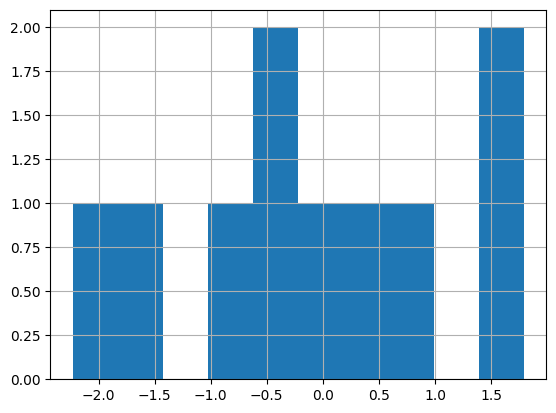

In [24]:
df_demo['X'].hist()

In [38]:
df_demo.index

RangeIndex(start=0, stop=10, step=1)

## 3 <a id='indeks'></a> Praca z indeksem
Indeks identyfikuje wiersze w `DataFrame`.

In [39]:
df_idx = pd.DataFrame({
    'Kraj': ['Polska', 'Czechy', 'Słowacja'],
    'PKB_mld_USD': [614, 282, 114]
})
display(df_idx)

,Kraj,PKB_mld_USD
0,Polska,614
1,Czechy,282
2,Słowacja,114


In [37]:
df_idx.index

RangeIndex(start=0, stop=3, step=1)

In [40]:
# Ustawiamy kolumnę 'Kraj' jako indeks
df_country = df_idx.set_index('Kraj')


In [41]:
print('Po ustawieniu indeksu:')
df_country

Po ustawieniu indeksu:


,PKB_mld_USD
Kraj,
Polska,614
Czechy,282
Słowacja,114


In [42]:
df_country.index

Index(['Polska', 'Czechy', 'Słowacja'], dtype='object', name='Kraj')

In [43]:
# Resetujemy indeks
print('\nPo reset_index():')
df_country.reset_index()


Po reset_index():


,Kraj,PKB_mld_USD
0,Polska,614
1,Czechy,282
2,Słowacja,114


In [44]:
# Wielopoziomowy indeks
df_multi = pd.DataFrame({
    'Region': ['EU', 'EU', 'EU', 'NA', 'NA'],
    'Państwo': ['Polska', 'Niemcy', 'Francja', 'USA', 'Kanada'],
    'PKB_per_capita': [15900, 46000, 43000, 65000, 52000]
}).set_index(['Region', 'Państwo'])
print('\nIndeks wielopoziomowy:')
df_multi


Indeks wielopoziomowy:


PKB_per_capita
Region Państwo                
EU     Polska            15900
       Niemcy            46000
       Francja           43000
NA     USA               65000
       Kanada            52000

In [32]:
df_multi.index

MultiIndex([('EU',  'Polska'),
            ('EU',  'Niemcy'),
            ('EU', 'Francja'),
            ('NA',     'USA'),
            ('NA',  'Kanada')],
           names=['Region', 'Państwo'])

Tworzenie DataFrame z indeksem:

In [45]:
df_idx = pd.DataFrame({
    'Kraj': ['Polska', 'Czechy', 'Słowacja'],
    'PKB_mld_USD': [614, 282, 114]
},
index=['PL', 'CZ', 'SL'])
display(df_idx)

,Kraj,PKB_mld_USD
PL,Polska,614
CZ,Czechy,282
SL,Słowacja,114


Modyfikacja indeksu bezpośrednio:

In [48]:
df_idx.index = ['POL', 'CZE', 'SLO']

In [49]:
df_idx

,Kraj,PKB_mld_USD
POL,Polska,614
CZE,Czechy,282
SLO,Słowacja,114


## 4 <a id='dostep'></a> Praca z kolumnami

In [50]:
df_access = pd.DataFrame({
    'Imię': ['Alan', 'Beata', 'Celina', 'Daniel'],
    'Wiek': [34, 28, 25, 42],
    'Miasto': ['Gdańsk', 'Warszawa', 'Wrocław', 'Poznań']
}, index=['a', 'b', 'c', 'd'])
df_access

,Imię,Wiek,Miasto
a,Alan,34,Gdańsk
b,Beata,28,Warszawa
c,Celina,25,Wrocław
d,Daniel,42,Poznań


In [51]:
df_access.columns

Index(['Imię', 'Wiek', 'Miasto'], dtype='object')

In [57]:
df_access['Imię']

a      Alan
b     Beata
c    Celina
d    Daniel
Name: Imię, dtype: object

In [55]:
type(df_access['Imię'])

pandas.core.series.Series

In [56]:
df_access[['Imię']]

,Imię
a,Alan
b,Beata
c,Celina
d,Daniel


In [58]:
type(df_access[['Imię']])

pandas.core.frame.DataFrame

In [59]:
df_access[['Imię', 'Wiek']]

,Imię,Wiek
a,Alan,34
b,Beata,28
c,Celina,25
d,Daniel,42


## 5 <a id='dostep'></a> Dostęp do danych: `loc`, `iloc`, `at`, `iat`

Uczymy się czterech metod dostępu: **etykietowy** (`loc`, `at`) oraz **pozycjny** (`iloc`, `iat`).

`loc` - wybór poprzez nazwę w indeksie:

In [60]:
df_access.loc['a']

Imię        Alan
Wiek          34
Miasto    Gdańsk
Name: a, dtype: object

In [61]:
df_access.loc[['a']]

,Imię,Wiek,Miasto
a,Alan,34,Gdańsk


In [62]:
df_access.loc[['a', 'd']]

,Imię,Wiek,Miasto
a,Alan,34,Gdańsk
d,Daniel,42,Poznań


In [63]:
df_access.loc[['a', 'd'], ['Wiek']]

,Wiek
a,34
d,42


`iloc` - wybór poprzez numer indeksu:

In [64]:
df_access.iloc[0]

Imię        Alan
Wiek          34
Miasto    Gdańsk
Name: a, dtype: object

In [65]:
df_access.iloc[[0]]

,Imię,Wiek,Miasto
a,Alan,34,Gdańsk


In [66]:
df_access.iloc[0:2]

,Imię,Wiek,Miasto
a,Alan,34,Gdańsk
b,Beata,28,Warszawa


In [67]:
df_access.iloc[0:2, 1]

a    34
b    28
Name: Wiek, dtype: int64

`at` - wybór pojedynczej wartości:

In [69]:
df_access.at['a', 'Miasto']

'Gdańsk'

`iat` - wybór pojedynczej wartości poprzez jej pozycję

In [70]:
df_access.iat[0, 2]

'Gdańsk'

## 6 <a id='selektory'></a> Wybieranie części danych



In [71]:
df_sel = pd.DataFrame({
    'Produkt': ['Kawa', 'Herbata', 'Sok', 'Woda', 'Piwo'],
    'Cena': [19.90, 9.99, 6.50, 2.00, 3.80],
    'Kategoria': ['Napoje', 'Napoje', 'Napoje', 'Napoje', 'Alkohol']
})
df_sel

,Produkt,Cena,Kategoria
0,Kawa,19.90,Napoje
1,Herbata,9.99,Napoje
2,Sok,6.50,Napoje
3,Woda,2.00,Napoje
4,Piwo,3.80,Alkohol


Sprawdzenie liczby wierszy:

In [72]:
len(df_sel)

5

In [73]:
len(df_sel.columns)

3

Wymiary tabelki (tak samo jak w NumPy)

In [74]:
df_sel.shape

(5, 3)

In [76]:
df_sel.values

array([['Kawa', 19.9, 'Napoje'],
       ['Herbata', 9.99, 'Napoje'],
       ['Sok', 6.5, 'Napoje'],
       ['Woda', 2.0, 'Napoje'],
       ['Piwo', 3.8, 'Alkohol']], dtype=object)

In [77]:
df_sel.dtypes

Produkt       object
Cena         float64
Kategoria     object
dtype: object

In [78]:
df_sel['Cena'] > 3

0     True
1     True
2     True
3    False
4     True
Name: Cena, dtype: bool

In [79]:
df_sel[df_sel['Cena'] > 3]

,Produkt,Cena,Kategoria
0,Kawa,19.90,Napoje
1,Herbata,9.99,Napoje
2,Sok,6.50,Napoje
4,Piwo,3.80,Alkohol


In [80]:
df_sel[df_sel['Kategoria'] != 'Alkohol']

,Produkt,Cena,Kategoria
0,Kawa,19.90,Napoje
1,Herbata,9.99,Napoje
2,Sok,6.50,Napoje
3,Woda,2.00,Napoje


In [81]:
df_sel[(df_sel['Cena'] > 3) & (df_sel['Kategoria'] != 'Alkohol')]



,Produkt,Cena,Kategoria
0,Kawa,19.90,Napoje
1,Herbata,9.99,Napoje
2,Sok,6.50,Napoje


In [ ]:
df_sel[(df_sel['Cena'] > 5) | (df_sel['Kategoria'] == 'Alkohol')]


## 7 Modyfikacja danych

### Modyfikacja pojedynczych wartości

In [82]:
df = pd.DataFrame({
    'Produkt': ['Kawa', 'Herbata', 'Sok', 'Woda'],
    'Cena': [19.90, 9.99, 6.50, 2.00],
    'Stan_magazyn': [50, 20, 100, 300]
})
df

,Produkt,Cena,Stan_magazyn
0,Kawa,19.90,50
1,Herbata,9.99,20
2,Sok,6.50,100
3,Woda,2.00,300


In [83]:
df.at[0, 'Cena'] = 21.50
df

,Produkt,Cena,Stan_magazyn
0,Kawa,21.50,50
1,Herbata,9.99,20
2,Sok,6.50,100
3,Woda,2.00,300


In [84]:
df.iat[2, 1] = 7.00
df

,Produkt,Cena,Stan_magazyn
0,Kawa,21.50,50
1,Herbata,9.99,20
2,Sok,7.00,100
3,Woda,2.00,300


In [85]:
df.loc[3, 'Stan_magazyn'] = 280
df

,Produkt,Cena,Stan_magazyn
0,Kawa,21.50,50
1,Herbata,9.99,20
2,Sok,7.00,100
3,Woda,2.00,280


### Modyfikacja kolumn

In [86]:
df['Cena']

0    21.50
1     9.99
2     7.00
3     2.00
Name: Cena, dtype: float64

In [88]:
df['Cena'] = [22, 11, 8, 1.6]
df

,Produkt,Cena,Stan_magazyn
0,Kawa,22.0,50
1,Herbata,11.0,20
2,Sok,8.0,100
3,Woda,1.6,280


In [87]:
df['Cena'] * 1.10

0    23.650
1    10.989
2     7.700
3     2.200
Name: Cena, dtype: float64

In [89]:
# podniesienie wszystkich cen o 10%
df['Cena'] = df['Cena'] * 1.10
df

,Produkt,Cena,Stan_magazyn
0,Kawa,24.20,50
1,Herbata,12.10,20
2,Sok,8.80,100
3,Woda,1.76,280


In [90]:
df['Stan_magazyn'].dtypes

dtype('int64')

In [91]:
df['Stan_magazyn'] = df['Stan_magazyn'].astype(float)

In [92]:
df

,Produkt,Cena,Stan_magazyn
0,Kawa,24.20,50.0
1,Herbata,12.10,20.0
2,Sok,8.80,100.0
3,Woda,1.76,280.0


In [93]:
df['Stan_magazyn'].dtypes

dtype('float64')

### Dodawanie i usuwanie kolumn

In [94]:
df['VAT'] = df['Cena'] * 0.23
df

,Produkt,Cena,Stan_magazyn,VAT
0,Kawa,24.20,50.0,5.5660
1,Herbata,12.10,20.0,2.7830
2,Sok,8.80,100.0,2.0240
3,Woda,1.76,280.0,0.4048


In [95]:
df.drop(columns='VAT')

,Produkt,Cena,Stan_magazyn
0,Kawa,24.20,50.0
1,Herbata,12.10,20.0
2,Sok,8.80,100.0
3,Woda,1.76,280.0


In [96]:
df

,Produkt,Cena,Stan_magazyn,VAT
0,Kawa,24.20,50.0,5.5660
1,Herbata,12.10,20.0,2.7830
2,Sok,8.80,100.0,2.0240
3,Woda,1.76,280.0,0.4048


In [97]:
df.drop(columns=['VAT'], inplace=True)
df

,Produkt,Cena,Stan_magazyn
0,Kawa,24.20,50.0
1,Herbata,12.10,20.0
2,Sok,8.80,100.0
3,Woda,1.76,280.0


In [98]:
['Premium' if x > 10 else 'Ekonomiczna' for x in df['Cena']]

['Premium', 'Premium', 'Ekonomiczna', 'Ekonomiczna']

In [99]:
df['Klasa'] = ['Premium' if x > 10 else 'Ekonomiczna' for x in df['Cena']]
df

,Produkt,Cena,Stan_magazyn,Klasa
0,Kawa,24.20,50.0,Premium
1,Herbata,12.10,20.0,Premium
2,Sok,8.80,100.0,Ekonomiczna
3,Woda,1.76,280.0,Ekonomiczna


### Modyfikacja i usuwanie wierszy

In [100]:
# Zmiana wiersza 1 (indeks = 1) – podajemy Series z nazwami kolumn
df.loc[1] = pd.Series({'Produkt': 'Nowa Herbata', 'Cena': 12.99, 'Stan_magazyn': 25})

In [101]:
df

,Produkt,Cena,Stan_magazyn,Klasa
0,Kawa,24.20,50.0,Premium
1,Nowa Herbata,12.99,25.0,NaN
2,Sok,8.80,100.0,Ekonomiczna
3,Woda,1.76,280.0,Ekonomiczna


In [102]:
# Ustaw cena = 0 dla produktów, których magazyn > 250
df.loc[df['Stan_magazyn'] > 250, 'Cena'] = 0
df

,Produkt,Cena,Stan_magazyn,Klasa
0,Kawa,24.20,50.0,Premium
1,Nowa Herbata,12.99,25.0,NaN
2,Sok,8.80,100.0,Ekonomiczna
3,Woda,0.00,280.0,Ekonomiczna


In [103]:
df.loc[4] = pd.Series({'Produkt': 'Jeszcze nowsza Herbata', 'Cena': 12.99, 'Stan_magazyn': 25})

In [104]:
df

,Produkt,Cena,Stan_magazyn,Klasa
0,Kawa,24.20,50.0,Premium
1,Nowa Herbata,12.99,25.0,NaN
2,Sok,8.80,100.0,Ekonomiczna
3,Woda,0.00,280.0,Ekonomiczna
4,Jeszcze nowsza Herbata,12.99,25.0,NaN


In [105]:
# Usuwamy wiersz o indeksie 2
df = df.drop(index=2)
df


,Produkt,Cena,Stan_magazyn,Klasa
0,Kawa,24.20,50.0,Premium
1,Nowa Herbata,12.99,25.0,NaN
3,Woda,0.00,280.0,Ekonomiczna
4,Jeszcze nowsza Herbata,12.99,25.0,NaN


## 9 Zadania praktyczne 📝
Spróbuj samodzielnie wykonać poniższe ćwiczenia w nowym notatniku lub w osobnych komórkach.

Poniżej jest kod, który wczytuje plik CSV z danymi sprzedaży (`sales_records.csv`), pamiętaj żeby umieścić go w katalogu roboczym w Colab lub na komputerze.

Następnie wykonaj następujące zadania:

1. **Podejrzyj dane**:
   Wyświetl pierwsze 5 oraz ostatnie 3 wiersze danych.

2. **Zarządzanie indeksem**:
   Ustaw kolumnę „Order ID” jako indeks, a następnie zresetuj indeks do domyślnego.

4. **Dostęp do danych**:
   Odczytaj wartość kolumny „Country” z pierwszego wiersza. Następnie wyświetl wiersze od 10 do 14 oraz pierwsze trzy kolumny.

5. **Filtrowanie danych**:
   Znajdź wszystkie zamówienia, w których „Total Profit” przekracza 1000000 oraz region to „Europe”.

6. **Tworzenie nowej kolumny**:
   Oblicz procentową marżę zysku (Total Profit / Total Revenue \* 100) i dodaj ją jako nową kolumnę.


In [106]:
df = pd.read_csv('sales_records.csv')

In [107]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [111]:
# Zadanie 1:  Wyświetl pierwsze 5 oraz ostatnie 3 wiersze danych.
display(df.head())
display(df.tail(3))

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [129]:
# Zadanie 2:  Ustaw kolumnę „Order ID” jako indeks, a następnie zresetuj indeks do domyślnego.
df.set_index('Order ID', inplace=True)
display(df)
df.reset_index(inplace=True)
display(df)





,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,,
669165933,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512878119,95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
810711038,96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
728815257,97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05


,Order ID,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,512878119,95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,810711038,96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,728815257,97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,559427106,98,North America,Mexico,Personal Care,Offline,M,7/30/2015,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [133]:
# Zadanie 3: Odczytaj wartość kolumny „Country” 
# z pierwszego wiersza. Następnie wyświetl wiersze 
# od 10 do 14 oraz pierwsze trzy kolumny.
display(df.loc[0, 'Country'])
df.iloc[10:15, 0:3]

'Tuvalu'

,Order ID,index,Region
10,814711606,10,Asia
11,939825713,11,Sub-Saharan Africa
12,187310731,12,Asia
13,522840487,13,Central America and the Caribbean
14,832401311,14,Asia


,Order ID,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,547995746,5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,135425221,6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,871543967,7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,770463311,8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,616607081,9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [135]:
# Zadanie 4: Znajdź wszystkie zamówienia, 
# w których „Total Profit” przekracza 1000000 
# oraz region to „Europe”.

df[(df['Total Profit'] > 1000000) & (df['Region'] == 'Europe')]

,Order ID,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
30,249693334,30,Europe,Switzerland,Cosmetics,Offline,M,9/17/2012,10/20/2012,8661,437.20,263.33,3786589.20,2280701.13,1505888.07
46,331438481,46,Europe,Iceland,Cosmetics,Online,C,12/31/2016,12/31/2016,8867,437.20,263.33,3876652.40,2334947.11,1541705.29
68,166460740,68,Europe,Lithuania,Office Supplies,Offline,H,10/24/2010,11/17/2010,8287,651.21,524.96,5396577.27,4350343.52,1046233.75
93,660643374,93,Europe,Romania,Cosmetics,Online,H,11/26/2010,12/25/2010,7910,437.20,263.33,3458252.00,2082940.30,1375311.70


In [ ]:
# Zadanie 5: Oblicz procentową marżę zysku 
# (Total Profit / Total Revenue \* 100) 
# i dodaj ją jako nową kolumnę.


In [136]:
df['Margin Profit'] = df['Total Profit'] / df['Total Revenue'] * 100
df

,Order ID,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Margin Profit
0,669165933,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924
1,963881480,1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574
2,341417157,2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987
3,514321792,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654
4,115456712,4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,512878119,95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,67.203514
96,810711038,96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,25.830654
97,728815257,97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,40.977541
98,559427106,98,North America,Mexico,Personal Care,Offline,M,7/30/2015,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,30.661936
